# VisWaterNet Tutorial

In this Jupyter Notebook, our goal is to explore different **network visualization** options provided by a Python package that builds on WNTR. 

For our analyses, we will use BWFLNet, a model of a real water distribution network. The Bristol Water Field Lab (BWFL) network is part of the water distribution network of the city of Bristol, UK, and it serves approximately 8,000 customer connections. BWFLnet is an operational network in Bristol, UK, operated by Bristol Water. The data provided is a the product of a long term research partnership between Bristol Water and Infrasense Labs at Imperial College London. The BWFLnet model and data set can be found [here](https://data.mendeley.com/datasets/srt4vr5k38/1).

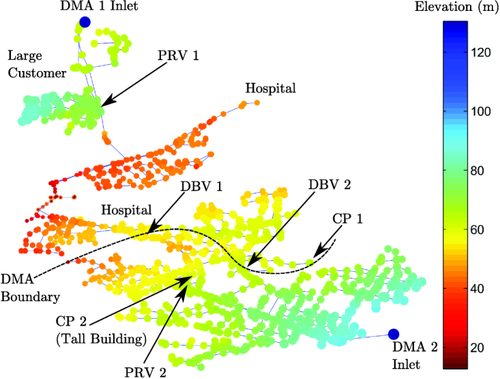

# 1. Getting Started

## 1.1. Imports

Our first step is to install and import the Python packages we need into this file:

In [1]:
# install packages
#!pip install wntr matplotlib numpy magnets viswaternet openpyxl

In [2]:
#import packages
import wntr
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
import os

if not os.path.isdir('figures'):
    os.makedirs('figures')

## 1.2. Create water network model 

Let us begin by defining the .INP file of the model and initializing a water network model object using WNTR. Note that this model has been slightly modified from the original model in the following ways:
1. some demand patterns are exactly the same as others so we have merged them
2. all throttle control valves (TCVs) in the model have been replaced with equivalent pipes

In [4]:
# import bwfl
inp = 'networks/BWFLnet_modified.inp'

# initialize water network model object
wn = wntr.network.WaterNetworkModel(inp)

## 1.3. Define critical nodes

Remember that this real network has several important junctions that we want to keep track of. Here, we define (1) a list of junction names representing locations of pressure sensors, (2) a list of junctions that are assigned different demand patterns, and (3) their neighboring nodes.

In [5]:
# list of junctions where pressure sensors are installed
pressure_sensors_list = ['node_1925', 'node_1938', 'node_1961', 'node_1971', 
                         'node_1983', 'node_0354', 'node_2012', 'node_2046', 
                         'node_2113', 'node_0785', 'node_2188', 'node_2197', 
                         'node_2210', 'node_2243', 'node_2265', 'node_2285', 
                         'node_1194', 'node_1202', 'node_2354', 'node_2428', 
                         'node_2440', 'node_2441', 'node_1738', 'node_2485', 
                         'node_1781', 'node_1876', 'node_2535']

# list of junctions with different demand patterns ...
diff_demand_pattern_list = ['node_0640', 'node_0870', 'node_0973', 'node_1122', 'node_1311', 
                            'node_1363', 'node_1388', 'node_1685', 'node_1813', 'node_2125', 
                            'node_2130', 'node_2167', 'node_2184', 'node_2220', 'node_2307']

# ... and their neighbors
diff_demand_neighbor_list = ['node_0595', 'node_0647', 'node_0648', 'node_2168', 'node_2152', 
                             'node_0907', 'node_0952', 'node_2199', 'node_2206', 'node_1121',
                             'node_2260', 'node_1315', 'node_1340', 'node_2350', 'node_1385',
                             'node_1386', 'node_1402', 'node_2439', 'node_2446', 'node_2456',
                             'node_1807', 'node_0718', 'node_2140', 'node_2112', 'node_0755',
                             'node_0890', 'node_0868', 'node_0913', 'node_0984', 'node_1037',
                             'node_1223', 'node_1262']

# list of all critical nodes
critical_nodes = pressure_sensors_list + diff_demand_pattern_list + diff_demand_neighbor_list

# 2. Network Visualization Using VisWaterNet

Here, we use **VisWaterNet** to make custom network visualizations. VisWaterNet allows plotting continuous, discrete, and categorical WNTR simulation results, and custom data generated or imported by the user (through a list or Excel file).


To begin plotting, we must first initialize a **VisWaterNet model object** for our network that holds information about system topology, node and link characteristics, and EPANET simulation results.

## 2.1. Initialize the VisWaterNet model

In [6]:
# Step 1: import viswaternet into the script
import viswaternet as vis

# Step 2: initialize a viswaternet model object from the .INP file
model=vis.VisWNModel(inp_file = inp)

Note: you can also create a VisWaterNet model object using a WNTR-compatible water network model object `wn` by specifying ```model=vis.VisWNModel(network_model = wn)```

## 2.2. Plotting basic network layout

We will first use VisWaterNet ```plot_basic_elements``` function to plot original the model **network layout**, and use the ```draw_nodes``` function to highlight the location of our **critical nodes**. 

Additionally, we will use ```NetworkStyle``` to define a **style object**, which can be used to customize the following:

1. shape, size, border, and color of node markers
2. width, line style, and color of links
3. base legend position, font size, and font color
4. discrete legend position, font size, and font color
5. colorbar colormap 

<font color='red'>We recommend visiting the [matplotlib docs](https://matplotlib.org/stable/index.html) to view options for [colors](https://matplotlib.org/stable/gallery/color/named_colors.html), [colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html), [node markers](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html), [line styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), etc. </font> 


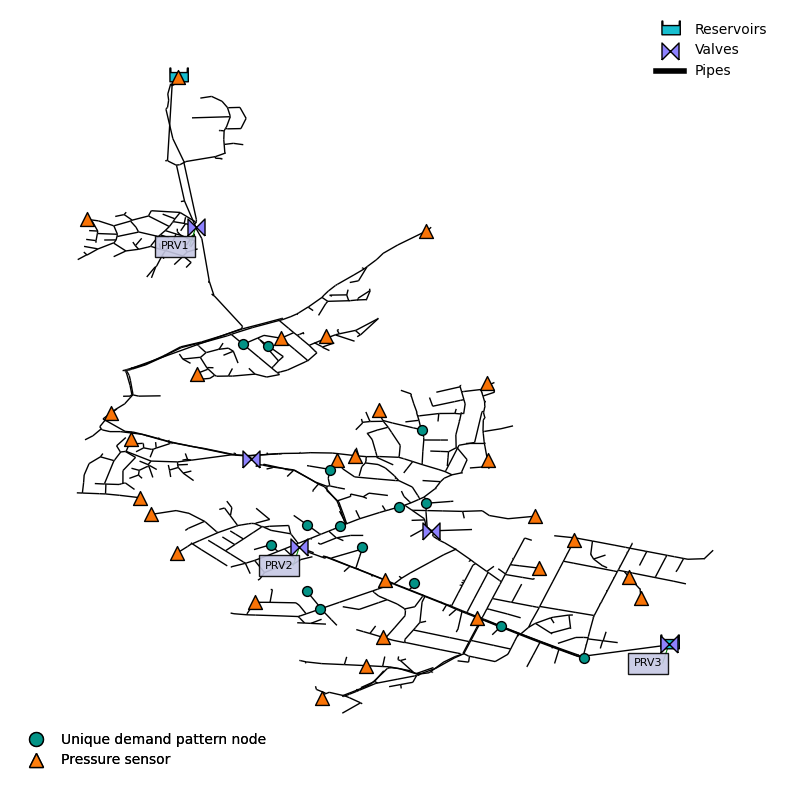

In [7]:
# Step 3: initialize matplotlib figure
fig, ax = plt.subplots(figsize=(8,8))
ax.set_frame_on(False)

# Step 4: define style object
style1 = vis.NetworkStyle(base_node_size=0, reservoir_size = 200, valve_size = 150,       # change size of elements
                          base_legend_label_font_size = 10,                               # customize base legend font size
                          reservoir_border_width = 1, reservoir_color='tab:cyan',         # customize reservoir markers
                          valve_color='xkcd:periwinkle')                                  # customize valve markers

# Step 5: plot water network layout 
model.plot_basic_elements(ax=ax,             # matplotlib axis
                          style=style1)      # implement style object

# Step 6: highlight pressure sensors
model.draw_nodes(ax=ax, node_list=pressure_sensors_list, node_color='xkcd:orange', 
                 node_shape='^', node_border_width=1, node_border_color='k')  

# Step 6: highlight nodes with different demand patterns
model.draw_nodes(ax=ax, node_list=diff_demand_pattern_list, node_color='xkcd:teal', 
                 node_shape='o', node_border_width=1, node_size=50, node_border_color='k')

# Step 7: label PRVs
prv_start_node_list = []
prv_list = []
for valve_name, valve in wn.valves():
    if valve.valve_type == 'PRV':
        prv_start_node_list.append(valve.start_node_name)
        prv_list.append(valve_name)
model.draw_label(ax=ax, draw_nodes=prv_start_node_list, labels=['PRV1', 'PRV2', 'PRV3'], 
                 x_coords=[-1000]*len(prv_list), y_coords=[-3000]*len(prv_list), 
                 label_font_size = 8, label_face_color = '#c6c8e4ff')
        

# Step 8: build a legend for the highlighted nodes
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='xkcd:teal', marker='o', markersize=10, lw=0, markeredgecolor= 'k'),
                 Line2D([0], [0], color='tab:orange', marker='^', markersize=10, lw=0, markeredgecolor= 'k')]
leg_labels = ['Unique demand pattern node', 'Pressure sensor' ]
legend = ax.legend(custom_lines, leg_labels, fontsize=10,  loc=3, frameon=False)
ax.add_artist(legend)

# save figure
plt.tight_layout()
plt.savefig('figures/network layout.png', dpi = 400)

Now, we will look at more options for network visualization using VisWaterNet.

## 2.3. Plotting mean nodal pressure with a legend

First, we will create a **discrete plot** of mean pressure at the nodes based on the WNTR simulation results. On the left will be the automatically produced plot, and we will demonstrate the easy customization capabilities of VisWaterNet in the plot on the right.

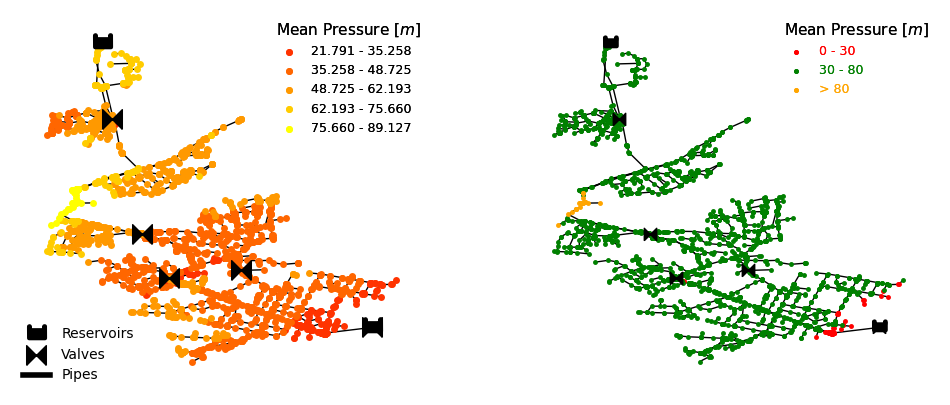

In [8]:
# initialize matplotlib subplots
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# define new style object
style2 = vis.NetworkStyle(discrete_legend_loc = 'upper right', discrete_legend_label_font_size = 9, 
                          discrete_legend_title_font_size = 11, 
                          base_legend_loc = 'lower left', base_legend_label_font_size=10)

# generate default plot
ax[0].set_frame_on(False)
model.plot_discrete_nodes(ax=ax[0], parameter = 'pressure', value = 'mean', style = style2)

# define new style object
style3 = vis.NetworkStyle(color_list = ['red', 'green', 'orange'], # assign colors to intervals
                          discrete_legend_loc = 'upper right', discrete_legend_label_color = 'interval_color', # customize legend
                          discrete_legend_label_font_size = 9, discrete_legend_title_font_size = 11,  # customize legend
                          legend_decimal_places = 0, draw_base_legend = False, # customize legends
                          valve_size=80, reservoir_size=80, node_size=50) # customize element markers

# generate cusomtized plot
ax[1].set_frame_on(False)
model.plot_discrete_nodes(ax=ax[1], parameter='pressure', value = 'mean', intervals = [0,30,80], style = style3)

## 2.4. Plotting user-supplied data

We can use the ```plot_unique_data``` function to plot **custom data**. Here, we import **pipe material data** from an **Excel file**, and plot the network. 

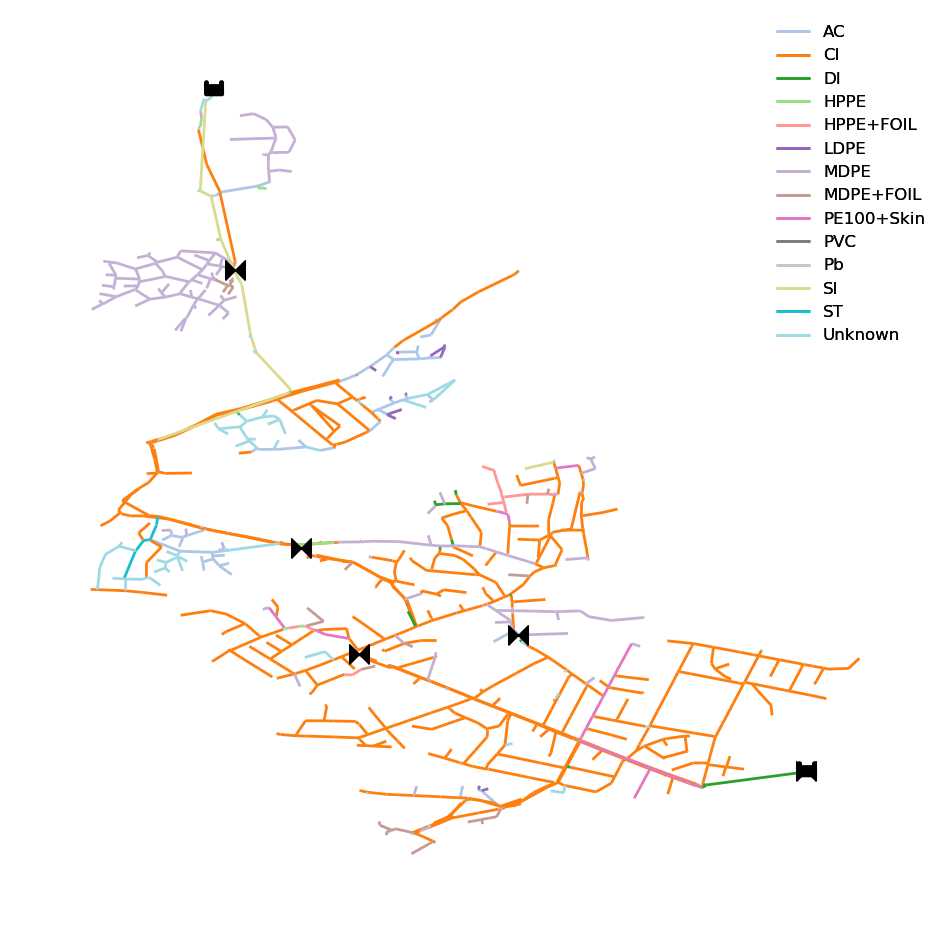

In [10]:
# define new style object
style4 = vis.NetworkStyle(cmap='tab20', draw_base_legend = False, 
                       discrete_legend_loc = 'upper right', discrete_legend_label_font_size=12, 
                       link_width=2)

# plot pipe materials with data from excel sheet
model.plot_unique_data(parameter = 'excel_data', parameter_type = 'link',
                       data_file = 'excel/bwflnet_materials.xlsx', # path to excel file 
                       excel_columns = [0,1], # these values represent excel file column indices of (0) list of nodes/links to plot and (1) their corresponding data points
                       data_type = 'unique', # data type: could be continuous (with colorbar) or discrete/unique (with legend)
                       style = style4)

## 2.5. Plotting user-generated data

Here, we demonstrate how to use the ```plot_unique_data``` function to plot data from a **list** for a **subset** of elements.

### Generate random data

In [11]:
import random

element_list = random.sample(wn.junction_name_list,100)
diff_list = list(np.random.uniform(-5,5,100))

### Create continuous plot

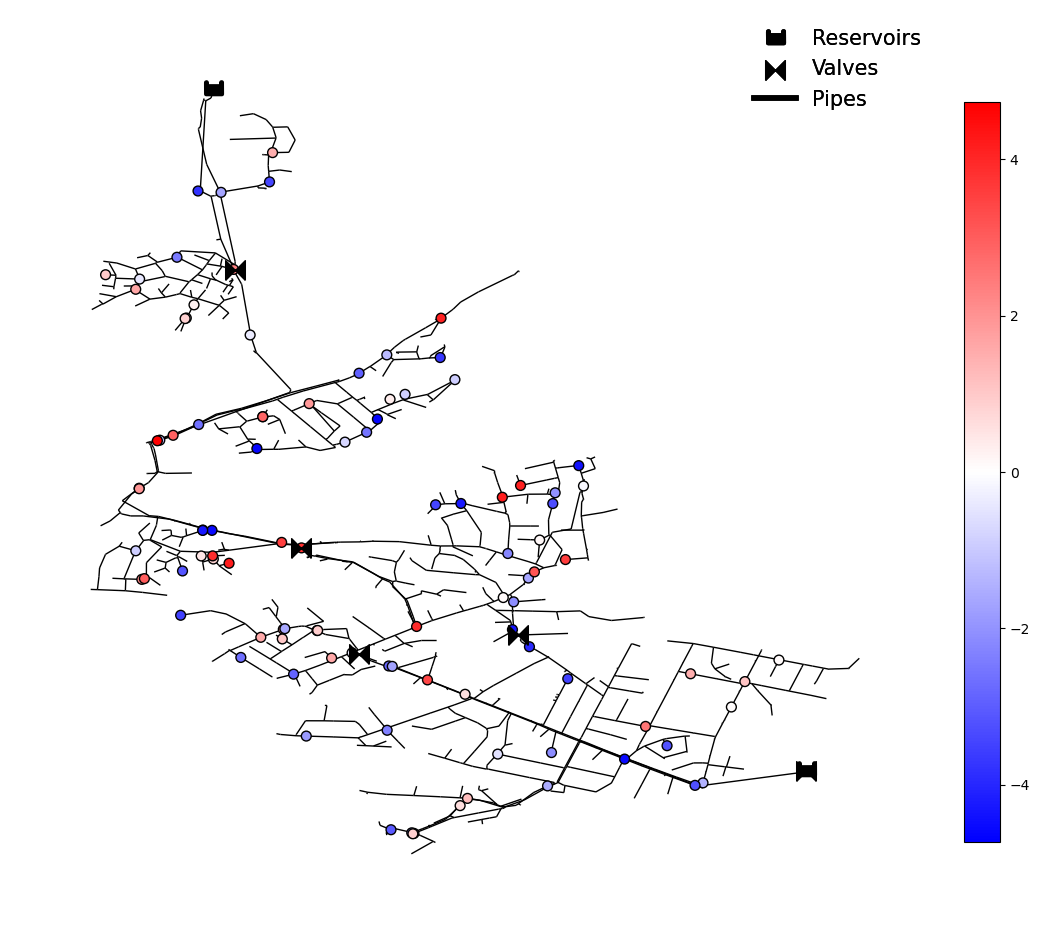

In [12]:
# define new style object
style5 = vis.NetworkStyle(node_size = 200, node_border_width = 1, node_border_color = "k",
                          color_bar_title = "Error (%)", cmap = 'bwr')

# plot user-generated data for a subset of junctions
model.plot_unique_data(parameter = "custom_data",
                   parameter_type = "node", data_type = "continuous", 
                   custom_data_values = [element_list, diff_list], 
                   style = style5)

## 2.6. Generating an animation

VisWaterNet can also create **animated plots** using the ```animate_plot``` function. In this example, a **trace** at the nodes from the lower reservoir (node_2547) is shown.

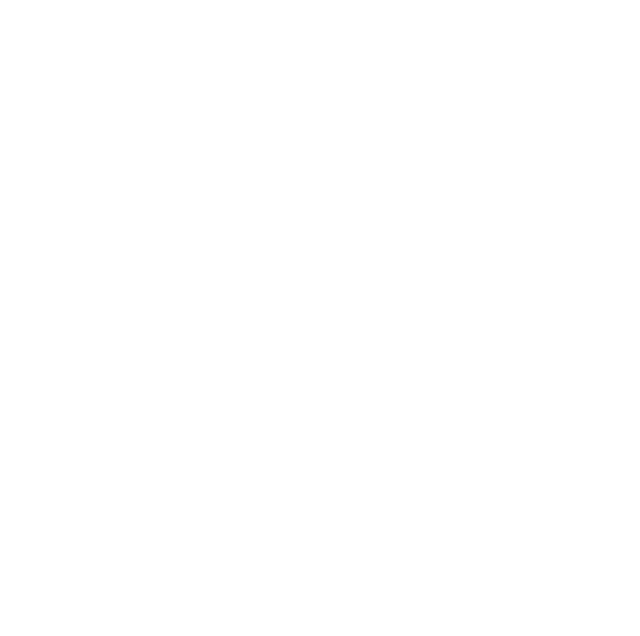

In [13]:
# define new style object
style6 = vis.NetworkStyle(cmap = 'Blues', valve_color = 'yellow', 
                   node_size = (0,200),
                   node_border_width = 0.5, node_border_color = 'lightgray', dpi = 400)

# generate animation
fig, ax = plt.subplots(figsize=(8,8));
ax.set_frame_on(False);
model.animate_plot(function = model.plot_continuous_nodes, 
                   ax=ax, parameter = 'quality',
                   style = style6, 
                   time_unit = 'hr', fps = 1,
                   color_bar_title = 'Trace from lower reservoir [%]',
                   first_timestep=0, last_timestep=None,
                   save_name = 'figures/traceplot', save_format='gif');

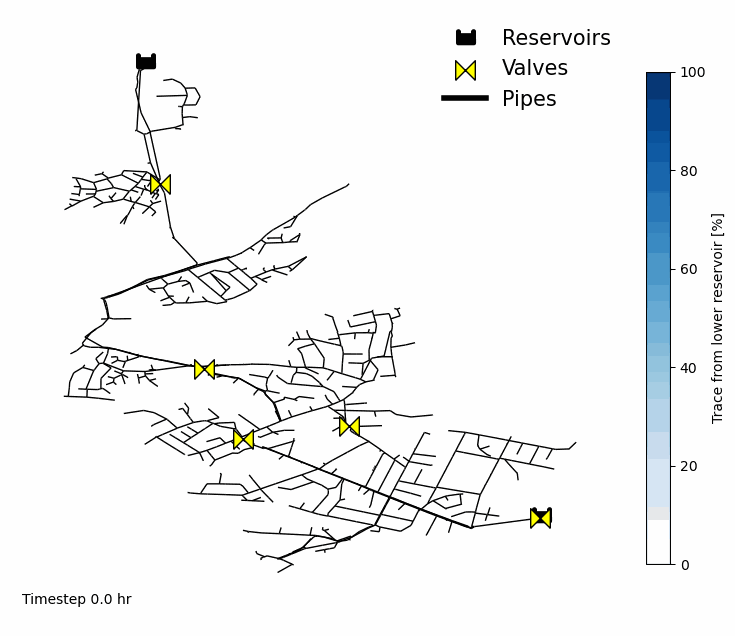

In [14]:
# display gif
from IPython.display import Image
Image(open('figures/traceplot.gif','rb').read())

# 2.7 Additional resources

Additional information and more examples can be found in our [documentation](https://viswaternet.readthedocs.io/en/latest/index.html) and [Github repository](https://github.com/tylertrimble/viswaternet).

A paper describing VisWaterNet has been published in the [Journal of Open Source Software](https://joss.theoj.org/papers/10.21105/joss.05139).

#### Additional resources to further customize the plots 

[Colormap options](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

[Color options](https://matplotlib.org/stable/gallery/color/named_colors.html)

[Node markers](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)

[Line styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

[Unit options](https://viswaternet.readthedocs.io/en/latest/_modules/viswaternet/utils/unit_conversion.html#unit_conversion)